In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import columns
import paths


def plot_data_correlation(file_path):
    file_path = Path(file_path)
    df = pd.read_csv(file_path, low_memory=False)
    
    numeric_df = df.select_dtypes(include=['number'])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    plt.title("Correlation Matrix")
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.tight_layout()
    plt.show()


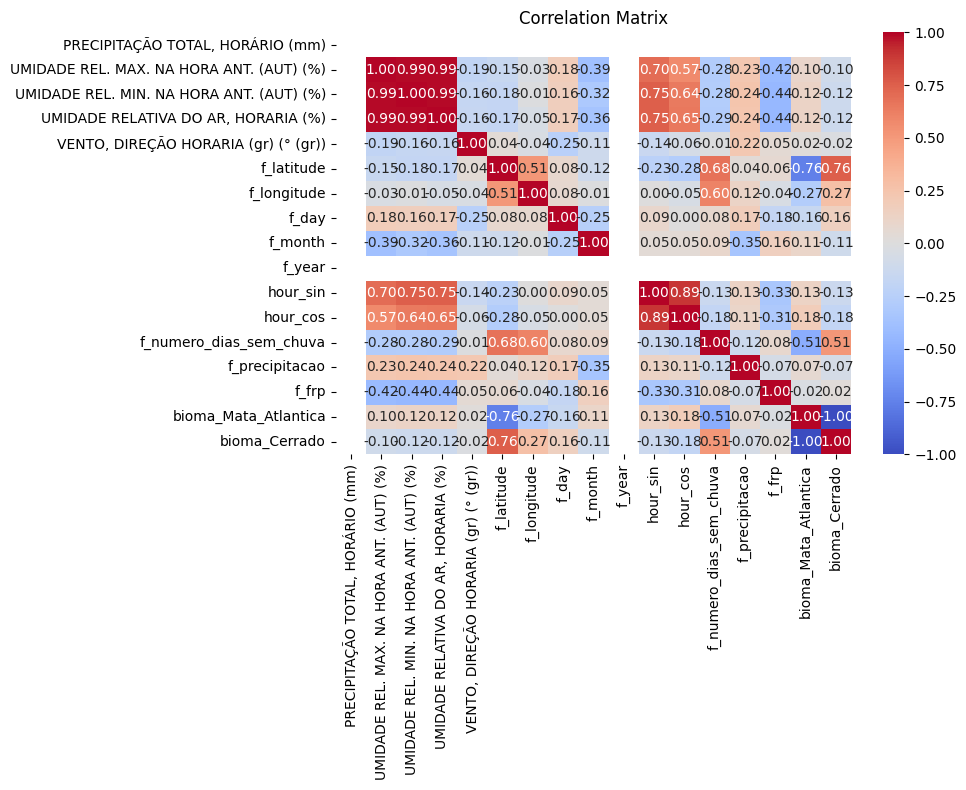

In [18]:
plot_data_correlation('data/focos_br_todos-sats_2024_no_cols_merged_with_inmet.csv')

In [11]:
import columns
import paths

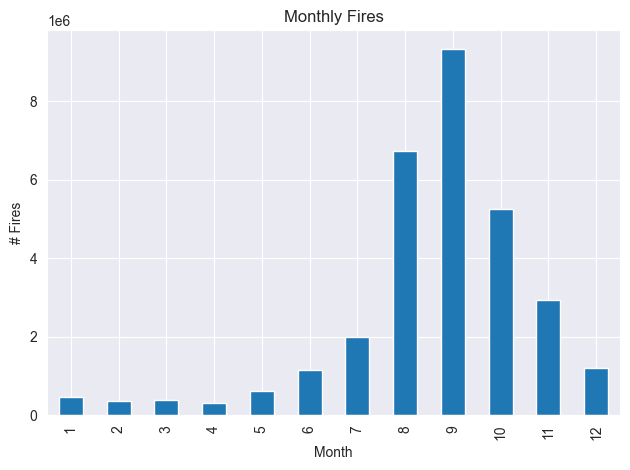

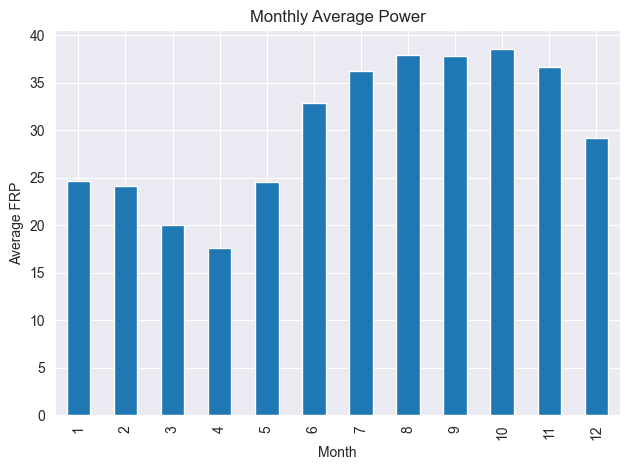

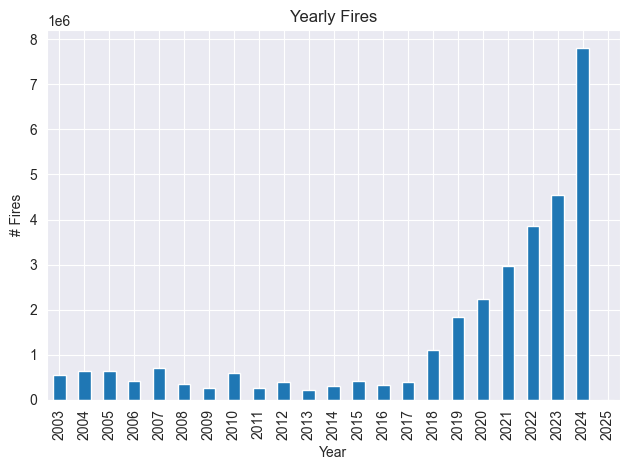

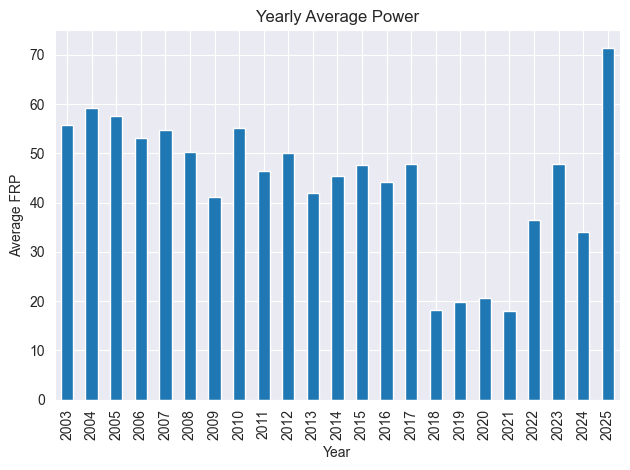

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(paths.inpe_stations_linked_file)

df['date'] = pd.to_datetime(df[columns.unix_date_time_column] * 3600, unit='s')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

monthly_fires = df.groupby('month').size()
plt.figure()
monthly_fires.plot(kind='bar')
plt.title("Monthly Fires")
plt.xlabel("Month")
plt.ylabel("# Fires")
plt.tight_layout()
plt.savefig(paths.monthly_fires_file)
plt.show()

monthly_intensity = df.groupby('month')['frp'].mean()
plt.figure()
monthly_intensity.plot(kind='bar')
plt.title("Monthly Average Power")
plt.xlabel("Month")
plt.ylabel("Average FRP")
plt.tight_layout()
plt.savefig(paths.monthly_intensity_file)
plt.show()

yearly_fires = df.groupby('year').size()
plt.figure()
yearly_fires.plot(kind='bar')
plt.title("Yearly Fires")
plt.xlabel("Year")
plt.ylabel("# Fires")
plt.tight_layout()
plt.savefig(paths.yearly_fires_file)
plt.show()

yearly_intensity = df.groupby('year')['frp'].mean()
plt.figure()
yearly_intensity.plot(kind='bar')
plt.title("Yearly Average Power")
plt.xlabel("Year")
plt.ylabel("Average FRP")
plt.tight_layout()
plt.savefig(paths.yearly_intensity_file)
plt.show()